In [1]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from mlrose import (
    random_hill_climb, 
    simulated_annealing, 
    genetic_alg,
    mimic
)

# My Examples

**4-peaks w/ Random Hill Climbing**

In [319]:
# From documentation: The Four Peaks fitness function is suitable for use in bit-string
# (discrete-state with :code:`max_val = 2`) optimization problems *only*.
fitness = mlrose.FourPeaks(t_pct=0.15)
# Define optimization object should always be DiscreteOpt (except for neural networks) 
problem = mlrose.DiscreteOpt(
    length = 3, 
    fitness_fn = fitness, 
    maximize = True, 
    max_val = 2)
random_hill_climb(
    problem=problem, 
    max_attempts=10, 
    max_iters=np.inf, 
    restarts=0, 
    init_state=None,
    curve=True,
    random_state=87)

(array([1, 1, 1]),
 3.0,
 array([1., 1., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3.]))

In [68]:
# From documentation: The Four Peaks fitness function is suitable for use in bit-string
# (discrete-state with :code:`max_val = 2`) optimization problems *only*.
fitness = mlrose.FourPeaks(t_pct=0.1)
# Define optimization object should always be DiscreteOpt (except for neural networks) 
problem = mlrose.DiscreteOpt(
    length = 5000, 
    fitness_fn = fitness, 
    maximize = True, 
    max_val = 2)

best_state, score = simulated_annealing(
    problem, 
    schedule=mlrose.ExpDecay(), 
    max_attempts=10000, 
    max_iters=100000, 
    init_state=None, 
    curve=False, 
    random_state=None)
print(score)

38.0


**MaxKColor w/ Simulated Annealing**

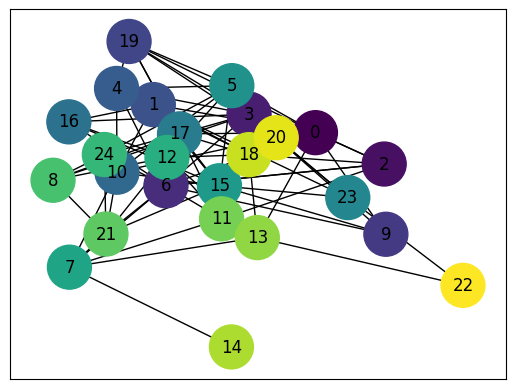

[(0, 2), (0, 3), (0, 6), (0, 9), (0, 19), (1, 0), (1, 4), (1, 10), (1, 16), (2, 0), (2, 6), (3, 6), (3, 17), (3, 19), (3, 23), (4, 3), (4, 10), (4, 17), (4, 19), (5, 0), (5, 4), (5, 15), (5, 19), (6, 2), (6, 4), (6, 7), (6, 12), (6, 24), (7, 10), (8, 3), (8, 21), (9, 6), (10, 5), (10, 15), (10, 21), (11, 2), (11, 6), (11, 7), (11, 12), (11, 15), (12, 5), (12, 8), (12, 13), (12, 16), (12, 17), (13, 0), (13, 7), (13, 11), (14, 7), (15, 1), (15, 9), (15, 16), (15, 21), (16, 3), (16, 6), (17, 0), (17, 1), (17, 8), (17, 11), (17, 15), (17, 18), (17, 19), (18, 1), (18, 2), (18, 4), (18, 12), (18, 13), (19, 17), (20, 5), (20, 9), (20, 10), (20, 19), (20, 23), (21, 6), (21, 7), (21, 12), (22, 13), (23, 1), (23, 15), (23, 22), (24, 5), (24, 8), (24, 17), (24, 21)]


In [12]:
# Graph generator (tune this)
np.random.seed(87)
density = .15
size = 25
edges = list()
for i in range(0, size):
    for j in range(0, size):
        if i==j:
            continue
        if np.random.random() > (1-density):
            edges.append((i, j))
# print(edges)
# Plotting graph: https://stackoverflow.com/questions/20133479/how-to-draw-directed-graphs-using-networkx-in-python
np.random.seed(22)  # TODO Try multiple seeds
G = nx.DiGraph()
G.add_edges_from(edges)

pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, #cmap=plt.get_cmap('plasma'), 
                       node_color = list(range(size)), node_size = 1000)

nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, edgelist=edges, arrows=True)
plt.show()

print(edges)

In [51]:

np.random.seed(87)
density = .05
size = 500
edges = list()
for i in range(0, size):
    for j in range(0, size):
        if i==j:
            continue
        if np.random.random() > (1-density):
            edges.append((i, j))

fitness = mlrose.MaxKColor(edges)
# Define optimization object should always be DiscreteOpt (except for neural networks) 
problem = mlrose.DiscreteOpt(
    length = size, 
    fitness_fn = fitness, 
    maximize = False, 
    max_val=15)

best_state, score = simulated_annealing(
    problem, 
    schedule=mlrose.ExpDecay(), 
    max_attempts=10000, 
    max_iters=100000, 
    init_state=None, 
    curve=False, 
    random_state=None)
best_state, score

(array([ 9, 11,  1,  4,  7,  1, 14,  5, 11,  0, 11, 11,  3,  4, 14,  8,  4,
         2,  8,  1,  1, 11,  7,  4,  6,  9, 11, 12, 14, 10,  5, 11,  1, 12,
         8, 13,  6, 13,  1,  1,  6,  8,  4, 10,  0,  3,  3,  3, 14,  1,  2,
         5,  2, 13,  0,  3,  3, 11, 10, 13, 13, 13, 14,  7,  9, 11,  9,  3,
        10,  4,  3,  2,  1,  4,  0,  8,  5,  9,  7,  3,  3, 11, 14,  5,  6,
        13,  6,  8,  0,  2, 11,  1,  9,  7, 14,  0, 12,  0,  6,  5,  9,  8,
         1,  1,  3,  5,  7,  0, 14,  2, 12, 12,  8,  7, 12,  3,  0,  6,  4,
         8,  9,  3,  5,  3,  6,  3,  1,  1,  2, 12,  2,  8,  1,  2,  8,  0,
         3,  8,  7,  3,  7,  5,  0, 14, 14, 14, 14,  2,  2,  7,  4, 12, 10,
        12, 12,  6,  3,  6,  3, 11,  5, 14,  2,  3,  8,  8,  4,  9,  8,  9,
         6,  7,  7,  1, 13, 10,  0,  4, 12,  9, 14,  1, 14,  2,  7, 10,  9,
         7,  9,  9, 14,  3,  5,  0, 13,  4, 10, 14, 13,  7,  1, 12,  9,  0,
        14, 14, 13, 11, 10,  3, 14,  2,  5, 10,  4, 12,  8,  3,  2, 10,  5,
         0, 

In [316]:
colors = ["red", "blue", "green", "black", "purple", "pink", "yellow"]

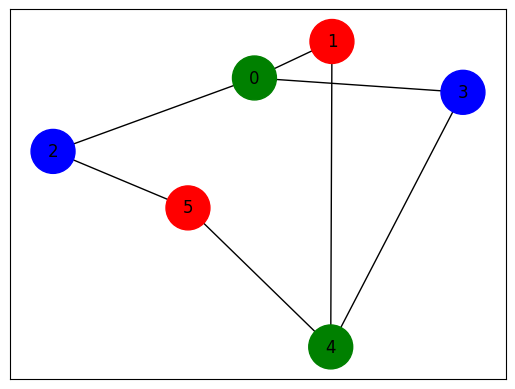

In [317]:
np.random.seed(17)  # TODO Try multiple seeds
G = nx.DiGraph()
G.add_edges_from(edges)

pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos,  
                       node_color = [colors[i] for i in best_state], 
                       node_size = 1000)

nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, edgelist=edges, arrows=False)
plt.show()

**Queens and genetic algorithm**

In [308]:
# Objective to have no attacks, so minimize
size = 10

fitness = mlrose.Queens()
problem = mlrose.DiscreteOpt(
    length = size, 
    fitness_fn = fitness, 
    maximize = False, 
    max_val = size)
genetic_alg(problem, 
pop_size=200, 
mutation_prob=0.1, 
max_attempts=10, 
max_iters=np.inf, 
curve=False, 
random_state=None)

(array([3, 0, 8, 1, 9, 4, 6, 8, 5, 2]), 3.0)

**Queens problem**

In [22]:
size = 100


fitness = mlrose.Queens()
problem = mlrose.DiscreteOpt(
    length = size, 
    fitness_fn = fitness, 
    maximize = False, 
    max_val = size)

In [31]:
genetic_alg(problem, 
pop_size=2000, 
mutation_prob=0.10, 
max_attempts=10, 
max_iters=np.inf, 
curve=True, 
random_state=None)

(array([89, 55, 53, 94, 47, 67, 10, 30, 19, 26,  2, 54, 61, 50, 66, 55, 30,
        16, 21, 82, 88,  9, 32, 17, 90,  7, 68, 96, 49, 99, 67, 75, 24, 17,
         1, 24,  2, 18, 52, 10, 26, 72, 44, 66, 88, 96, 37, 95, 71,  3, 62,
        70, 71, 60, 41,  7, 12,  5, 43, 95, 19, 62, 67, 74, 65, 52, 82, 80,
        43, 98, 94, 40, 81, 79, 46, 27, 92,  7,  3, 21, 77, 60, 92, 38, 41,
        29, 64, 50, 20, 25, 45, 78, 57,  0, 91, 64, 37, 79, 27, 77]),
 79.0,
 array([-86., -83., -80., -79., -79., -79., -79., -79., -79., -79., -79.,
        -79., -79., -79.]))

In [33]:
mimic(problem, 
    pop_size=1000, 
    keep_pct=0.2, 
    max_attempts=10, 
    max_iters=np.inf, 
    curve=True, 
    random_state=None, 
    fast_mimic=False)

(array([30, 90, 61, 76, 51, 10, 48, 90, 23, 69, 77, 38, 97, 39, 75, 81, 96,
        61, 80, 88, 56, 84, 34, 47, 37,  3, 72, 41, 29, 64, 78, 82,  3, 89,
        13, 83, 44, 48, 45, 63, 34, 78, 58,  5, 86, 32, 66, 74, 25, 68, 31,
         2, 43, 35, 46, 74, 20, 94, 59,  8, 67,  1, 65, 53, 33,  0, 17, 17,
        71, 21, 54, 57, 22,  6, 62, 11, 50, 99, 99, 72, 98, 73,  7, 25, 82,
        65,  6, 19, 97, 70, 49, 53, 50, 60, 40, 78, 85, 36, 12, 98]),
 48.0,
 array([-83., -75., -70., -65., -65., -62., -60., -56., -54., -54., -53.,
        -52., -52., -52., -52., -49., -49., -49., -49., -49., -49., -49.,
        -48., -48., -48., -48., -48., -48., -48., -48., -48., -48., -48.]))

In [29]:
simulated_annealing(
    problem, 
    schedule=mlrose.ExpDecay(), 
    max_attempts=2000, 
    max_iters=np.inf, 
    init_state=None, 
    curve=True, 
    random_state=87)

(array([26, 65, 31, 21, 77,  5, 52, 35, 42, 69, 60, 41,  1, 71, 45, 72, 13,
        54, 87, 70, 99, 46, 17, 59, 62, 84, 88, 49, 51, 68,  6, 98, 25, 14,
        97,  8, 63, 86, 39, 16,  0, 32, 85, 11, 64, 92, 94, 66, 15, 23, 19,
        53, 40,  7,  2, 47, 38, 90,  3,  9, 81,  4, 58, 28, 10, 36, 24, 78,
        75, 93, 33, 80, 82, 43, 91, 50, 74, 18, 29, 73, 44, 67, 95, 27, 37,
        57, 89, 48, 30, 22, 56, 76, 20, 83, 12, 79, 34, 96, 55, 61]),
 0.0,
 array([-104., -104., -101., ...,   -0.,   -0.,   -0.]))

# Plan for analysis

**Discover optimal values for larger problems**

* Queens needs structure so mimic and ga might have advantage
    * Create a large queens problem that can finish within 5 seconds
    